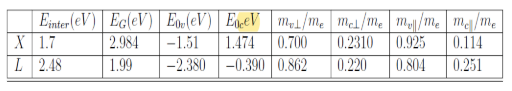

The energies are given wrt $E_F$, and $E_{0c}$ is negative, does that mean that both

In [1]:
import numpy as np
import matplotlib.pyplot as plt

hbar = 1.05457182e-34     # [J*s]
k_B = 1.380649e-23        # [J/K]
T = 300                   # [k]
beta = 1 / (k_B*T)        # [1/J]
m_e = 9.1093837e-31       # [kg]
eV2J = 1.60218e-19        # [J/eV]
a = 4.08e-10              # [m]     (lattice constant)

mu_cv_L = 0.2e-47         # [kg*J]
mu_cv_X = 0.86e-48        # [kg*J]
# E_F_Au = 

E_0V_X = -1.51*eV2J       # [J]
E_0C_X = 1.474*eV2J       # [J]

m_perp_V_X = 0.7*m_e      # [kg]
m_perp_C_X = 0.231*m_e    # [kg]
m_par_V_X = 0.925*m_e     # [kg]
m_par_C_X = 0.114*m_e     # [kg]

E_0V_L = -2.38*eV2J       # [J]
E_0C_L = -0.39*eV2J       # [J]

m_perp_V_L = 0.862*m_e    # [kg]
m_perp_C_L = 0.220*m_e    # [kg]
m_par_V_L = 0.804*m_e     # [kg]
m_par_C_L = 0.251*m_e     # [kg]

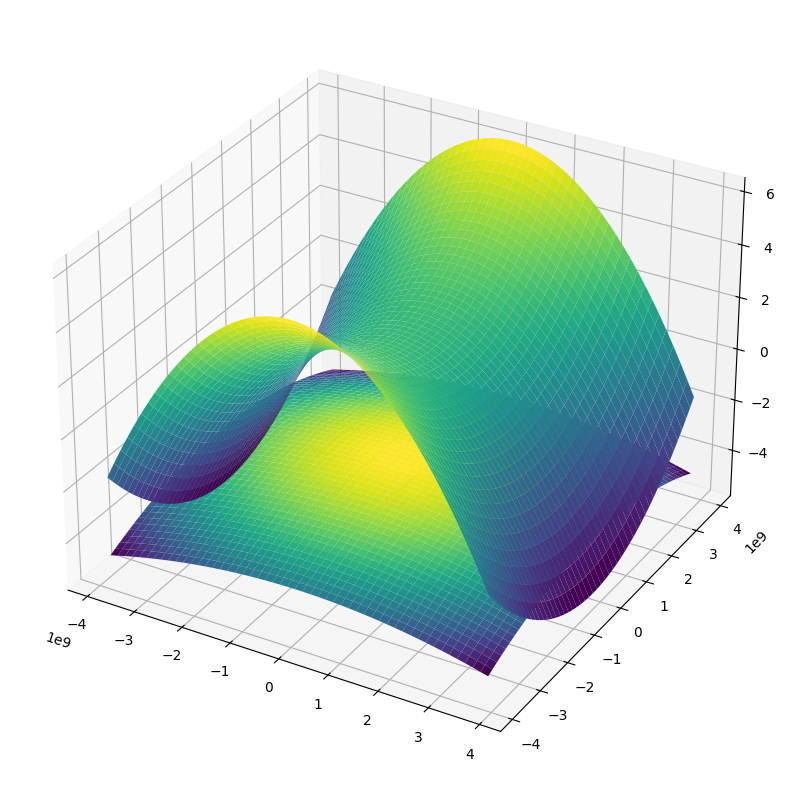

In [2]:
E_v_X_params = [E_0V_X, m_perp_V_X, m_par_V_X]
E_c_X_params = [E_0C_X, m_perp_C_X, m_par_C_X]

E_v_L_params = [E_0V_L, m_perp_V_L, m_par_V_L]
E_c_L_params = [E_0C_L, m_perp_C_L, m_par_C_L]

def E_v(k_par, k_perp, params):
    E_0, m_perp, m_par = params
    
    E_perp = ((hbar*k_perp)**2)/(2*m_perp)
    E_par = ((hbar*k_par)**2)/(2*m_par)
    
    return E_0 - E_perp - E_par

def E_c(k_par, k_perp, params):
    E_0, m_perp, m_par = params
    
    E_perp = ((hbar*k_perp)**2)/(2*m_perp)
    E_par = ((hbar*k_par)**2)/(2*m_par)
    
    return E_0 + E_perp - E_par

# Plot energy bands

N_perp = np.pi/(2*a)
N_par = np.pi/(2*a)
k_perp = np.linspace(- N_perp, N_perp, 1000)
k_par = np.linspace(- N_par, N_par, 1000)
k_par, k_perp = np.meshgrid(k_par, k_perp)

E_c_X = E_c(k_par, k_perp, E_c_X_params)
E_v_X = E_v(k_par, k_perp, E_v_X_params)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(k_par, k_perp, E_c_X, cmap='viridis')
ax.plot_surface(k_par, k_perp, E_v_X, cmap='viridis')

In [3]:
import ipywidgets as widgets

N_perp = np.pi/(2*a)
N_par = np.pi/(2*a)
k_perp = np.linspace(- N_perp, N_perp, 1000)
k_par = np.linspace(- N_par, N_par, 1000)
k_par, k_perp = np.meshgrid(k_par, k_perp)

mask = ((k_par**2) + (k_perp**2)) <= (np.pi/(2.5*a))**2

E_c_X_masked = np.where(mask, E_c(k_par, k_perp, E_c_X_params), np.nan)
E_v_X_masked = np.where(mask, E_v(k_par, k_perp, E_v_X_params), np.nan)
print(np.shape(E_c(k_par, k_perp, E_c_X_params)))

def plot(elev = 30, azim = 240):   
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')
    file_path = r"/Users/ben/Desktop/[ 3 ] Work in Progress/band structure GIF/{}.png".format(a)
    ax.view_init(elev=elev, azim=azim)
    ax.plot_surface(k_par, k_perp, E_c_X_masked, cmap='viridis', alpha = 0.9)
    ax.plot_surface(k_par, k_perp, E_v_X_masked, cmap='viridis', alpha = 1.0)



widgets.interact(plot, elev = (-90,90,1), azim = (0,360,1))

(1000, 1000)


interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=240, descripti…

<function __main__.plot(elev=30, azim=240)>

In [4]:
k_BZ = np.pi/(2.0*a)

def plot(elev = 30, azim = 240, k_max = k_BZ):
    
    N_perp = np.pi/(2*a)
    N_par = np.pi/(2*a)
    k_perp = np.linspace(- N_perp, N_perp, 1000)
    k_par = np.linspace(- N_par, N_par, 1000)
    k_par, k_perp = np.meshgrid(k_par, k_perp)
    mask = ((k_par**2) + (k_perp**2)) <= (k_max)**2

    E_c_X = E_c(k_par, k_perp, E_c_X_params)
    E_v_X = E_v(k_par, k_perp, E_v_X_params)

    E_c_X_masked = np.where(mask, E_c_X, np.nan)
    E_v_X_masked = np.where(mask, E_v_X, np.nan)
    
    
    fig = plt.figure(figsize = (14,10))
    ax = fig.add_subplot(111, projection='3d')
    file_path = r"/Users/ben/Desktop/[ 3 ] Work in Progress/band structure GIF/{}.png".format(a)
    ax.view_init(elev=elev, azim=azim)
    ax.plot_surface(k_par, k_perp, E_c_X_masked, cmap='viridis', alpha = 0.9)
    ax.plot_surface(k_par, k_perp, E_v_X_masked, cmap='viridis')

    ax.set_xlabel(r'$k_{\parallel}$')    
    ax.set_ylabel(r'$k_{\perp}$')
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel(r'$\mathcal{E}$ [eV]', rotation = 90)

    
    ax.set_xticks([-N_par,N_par], labels = [r'$-\frac{\pi}{2a}$', r'$\frac{\pi}{2a}$'])
    ax.set_yticks([-N_perp,N_perp], labels = [r'$-\frac{\pi}{2a}$', r'$\frac{\pi}{2a}$'])
    
    J2eV = 1 / (1.602e-19)
    
    min_z = np.nanmin(E_v_X_masked)
    upper_v = np.nanmax(E_v_X_masked)
    lower_c = np.nanmin(E_c_X_masked)
    max_z = np.nanmax(E_c_X_masked)
    min_z_label = f"{np.round(min_z*J2eV,2)}"
    upper_v_label = f"{np.round(upper_v*J2eV,2)}"
    lower_c_label = f"{np.round(lower_c*J2eV,2)}"
    max_z_label = f"{np.round(max_z*J2eV,2)}"
    
    ax.set_zticks([min_z, upper_v, lower_c, max_z], labels = [min_z_label, upper_v_label, lower_c_label, max_z_label])


widgets.interact(plot, elev = (-90,90,1), azim = (0,360,1), k_max = (0.25*k_BZ, 1.0*k_BZ, 0.1*k_BZ));

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=240, descripti…

In [5]:
k_BZ = np.pi/(2.0*a)

def plot(elev = 30, azim = 240, k_max = k_BZ):
    
    N_perp = np.pi/(2*a)
    N_par = np.pi/(2*a)
    k_perp = np.linspace(- N_perp, N_perp, 1000)
    k_par = np.linspace(- N_par, N_par, 1000)
    k_par, k_perp = np.meshgrid(k_par, k_perp)
    mask = ((k_par**2) + (k_perp**2)) <= (k_max)**2

    E_c_L = E_c(k_par, k_perp, E_c_L_params)
    E_v_L = E_v(k_par, k_perp, E_v_L_params)

    E_c_L_masked = np.where(mask, E_c_L, np.nan)
    E_v_L_masked = np.where(mask, E_v_L, np.nan)
    
    
    fig = plt.figure(figsize = (14,10))
    ax = fig.add_subplot(111, projection='3d')
    file_path = r"/Users/ben/Desktop/[ 3 ] Work in Progress/band structure GIF/{}.png".format(a)
    ax.view_init(elev=elev, azim=azim)
    ax.plot_surface(k_par, k_perp, E_c_L_masked, cmap='viridis', alpha = 0.9)
    ax.plot_surface(k_par, k_perp, E_v_L_masked, cmap='viridis')

    ax.set_xlabel(r'$k_{\parallel}$')    
    ax.set_ylabel(r'$k_{\perp}$')
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel(r'$\mathcal{E}$ [eV]', rotation = 90)

    
    ax.set_xticks([-N_par,N_par], labels = [r'$-\frac{\pi}{2a}$', r'$\frac{\pi}{2a}$'])
    ax.set_yticks([-N_perp,N_perp], labels = [r'$-\frac{\pi}{2a}$', r'$\frac{\pi}{2a}$'])
    
    J2eV = 1 / (1.602e-19)
    
    min_z = np.nanmin(E_v_L_masked)
    upper_v = np.nanmax(E_v_L_masked)
    lower_c = np.nanmin(E_c_L_masked)
    max_z = np.nanmax(E_c_L_masked)
    min_z_label = f"{np.round(min_z*J2eV,2)}"
    upper_v_label = f"{np.round(upper_v*J2eV,2)}"
    lower_c_label = f"{np.round(lower_c*J2eV,2)}"
    max_z_label = f"{np.round(max_z*J2eV,2)}"
    
    ax.set_zticks([min_z, upper_v, lower_c, max_z], labels = [min_z_label, upper_v_label, lower_c_label, max_z_label])


widgets.interact(plot, elev = (-90,90,1), azim = (0,360,1), k_max = (0.25*k_BZ, 1.0*k_BZ, 0.1*k_BZ));

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=240, descripti…

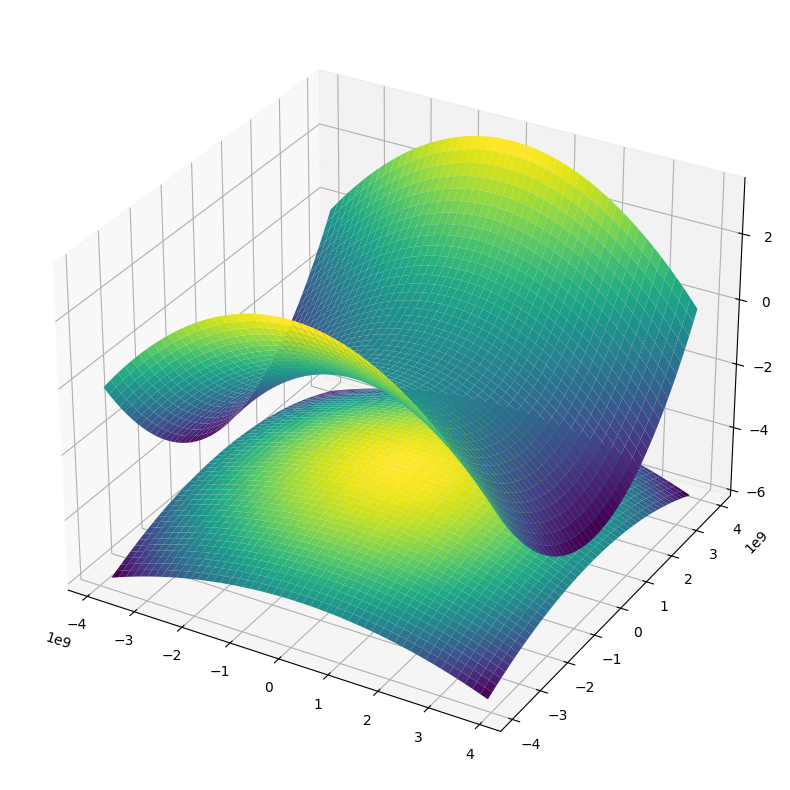

In [6]:
E_c_L = E_c(k_par, k_perp, E_c_L_params)
E_v_L = E_v(k_par, k_perp, E_v_L_params)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(k_par, k_perp, E_c_L, cmap='viridis')
ax.plot_surface(k_par, k_perp, E_v_L, cmap='viridis')

fig.savefig("/Users/ben/Desktop/SVG.svg")

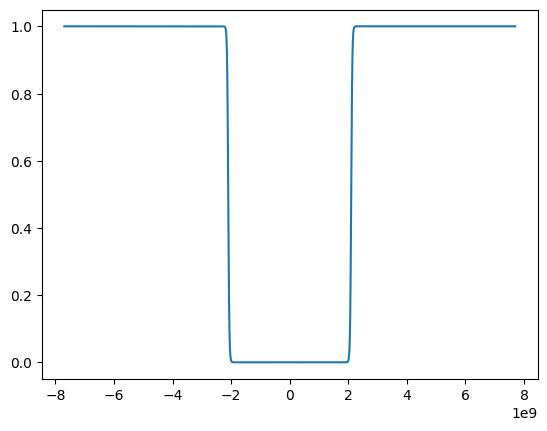

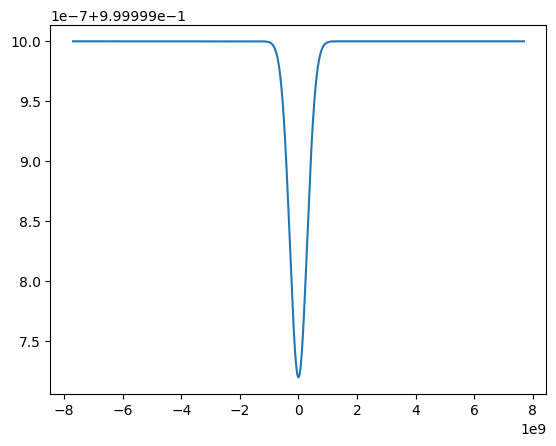

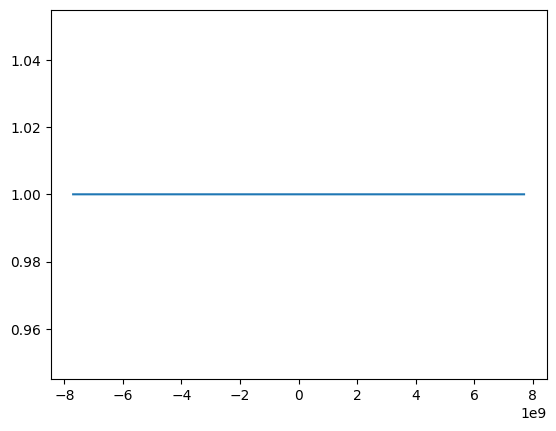

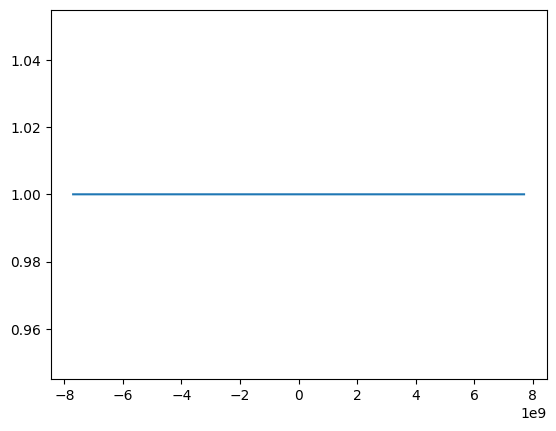

In [7]:

def FD(k_par, k_perp, E, params):
    F = np.exp( beta*( E(k_par, k_perp, params) ) )
    return 1 / (1 + F)


def FD_c(k_par, k_perp, params):
    E_0, m_perp, m_par = params
    
    E_perp = ((hbar*k_perp)**2)/(2*m_perp)
    E_par = ((hbar*k_par)**2)/(2*m_par)
    
    E = E_0 + E_perp - E_par
    
    F = np.exp( beta*( E ) )
    return 1 / (1 + F)


N = np.pi/a
k_perp = 0
k_par = np.linspace(- N, N, 100000)

y_c_X = FD(k_par, k_perp, E_c, E_c_X_params)
y_c_L = FD(k_par, k_perp, E_c, E_c_L_params)
y_v_X = FD(k_par, k_perp, E_v, E_v_X_params)
y_v_L = FD(k_par, k_perp, E_v, E_v_L_params)

plt.plot(k_par, y_c_X)
plt.show()
plt.plot(k_par, y_c_L)
plt.show()
plt.plot(k_par, y_v_X)
plt.show()
plt.plot(k_par, y_v_L)
plt.show()

Text(0.5, 0.5, '$k_{\\perp}$')

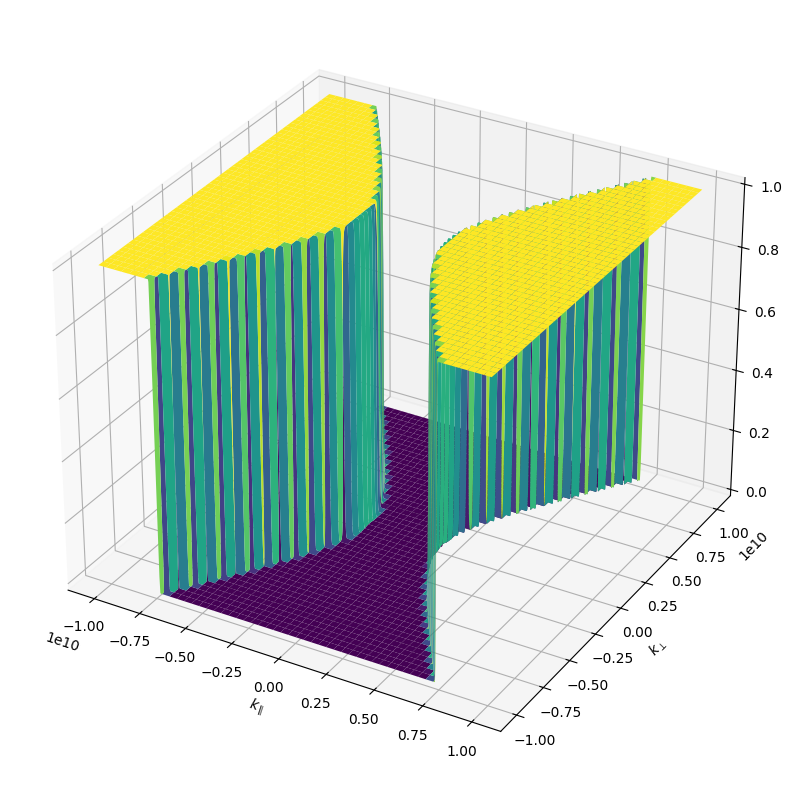

In [8]:
from mpl_toolkits.mplot3d import Axes3D

N_perp = 1e10
N_par = 1e10
k_perp = np.linspace(- N_perp, N_perp, 1000)
k_par = np.linspace(- N_par, N_par, 1000)
k_perp, k_par = np.meshgrid(k_perp, k_par)
f = FD(k_par, k_perp, E_c, E_c_X_params)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(k_par, k_perp, f, cmap='viridis')

ax.set_xlabel(r"$k_{\parallel}$")
ax.set_ylabel(r"$k_{\perp}$")

In [9]:
def FermiDirac(k):
    F = np.exp( beta*( ((hbar*k)**2)/(2*m_e)) )
    return 1 / (1+F)

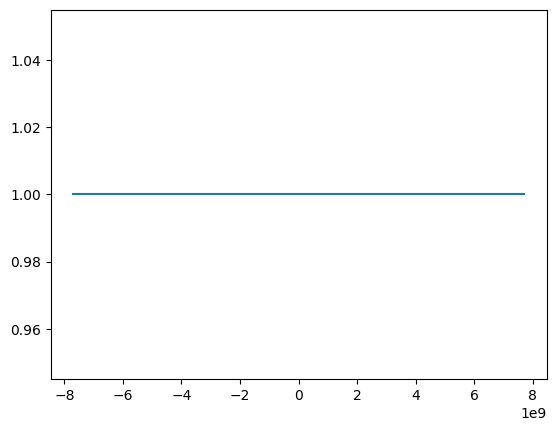

In [10]:
k_par = np.linspace(-N, N, 1000)
k_perp = 0

y = FD(k_par, k_perp, E_v, E_v_X_params)
def FD_v_X(k_par, k_perp):
    return FD(k_par, k_perp, E_v, E_v_X_params)

plt.plot(k_par, y)

In [11]:
import ipywidgets as widgets

def FermiDirac(T):
    beta = 1/(k_B*T)
    # print(beta)
    e = np.linspace(-1e-11,1e-11,10000)
    F = np.exp( beta*( e**2 ) )
    y = 1 / (1+F)

    plt.plot(e, y)
    plt.ylim(0,1)

widgets.interact(FermiDirac, T = (0.001,0.1,0.000001) )

interactive(children=(FloatSlider(value=0.050499999999999996, description='T', max=0.1, min=0.001, step=1e-06)…

<function __main__.FermiDirac(T)>